In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


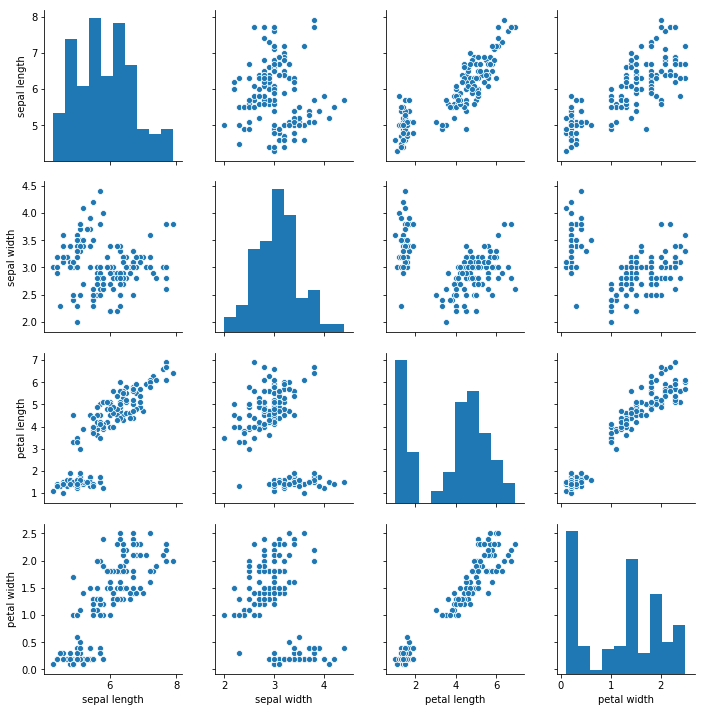

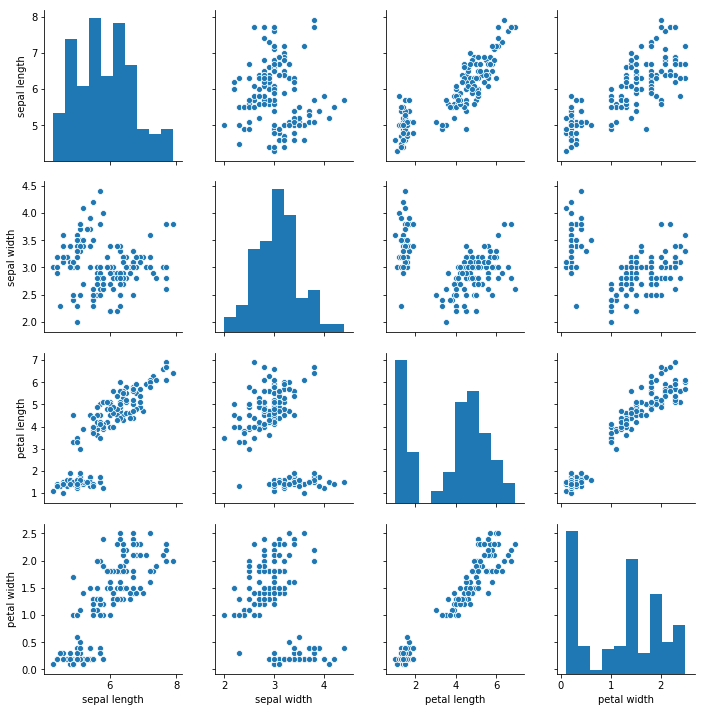

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width
sepal length,1,-0.109369,0.871754,0.817954
sepal width,-0.109369,1,-0.420516,-0.356544
petal length,0.871754,-0.420516,1,0.962757
petal width,0.817954,-0.356544,0.962757,1


In [16]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [20]:
x[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [21]:
y[0]

array(['Iris-setosa'], dtype=object)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [24]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [25]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

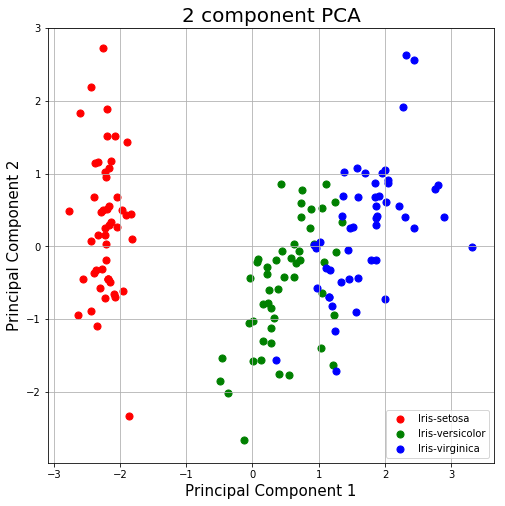

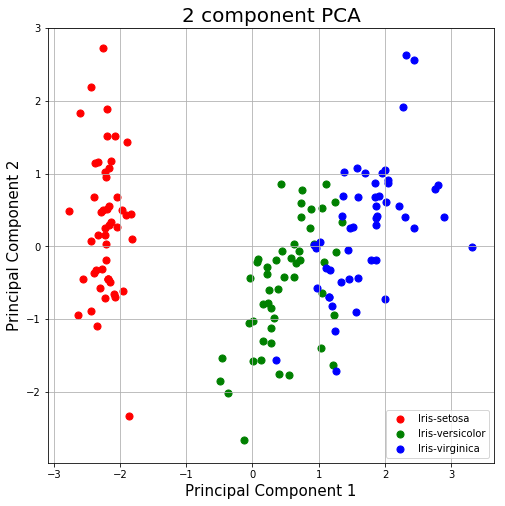

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'], c = color , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [27]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principalDf,y,test_size=.3)

In [33]:
len(x_train)

105

In [35]:
# Decision Tree Classifier
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
predictions=classifier.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))


0.8888888888888888


In [39]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_test,  predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        10
     class 1       0.84      0.89      0.86        18
     class 2       0.88      0.82      0.85        17

   micro avg       0.89      0.89      0.89        45
   macro avg       0.91      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45



In [40]:
# KNN Classifier
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()
classifier.fit(x_train,y_train)

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
predictions=classifier.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))


0.9333333333333333


In [43]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_test,  predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        10
     class 1       0.94      0.89      0.91        18
     class 2       0.89      0.94      0.91        17

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [48]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, predictions) 
print(results) 

[[10  0  0]
 [ 0 16  2]
 [ 0  1 16]]


In [50]:
# SVM Classifier
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
#Predict the response for test dataset
predictions = clf.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))


0.9555555555555556


In [54]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_test,  predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        10
     class 1       1.00      0.89      0.94        18
     class 2       0.89      1.00      0.94        17

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [55]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, predictions) 
print(results) 

[[10  0  0]
 [ 0 16  2]
 [ 0  0 17]]
